## import packages

In [57]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib qt
%matplotlib inline

## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Compute the camera calibration using chessboard images
extract object points and image points for camera calibration

In [31]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# need (1) the number of inside corners in x and (2) the number of inside corners in y
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space.  ex:array([[ 0.,  0.,  0.],[ 1.,  0.,  0.],[ 2.,  0.,  0.],[ 3.,  0.,  0.],

imgpoints = [] # 2d points in image plane. ex: [array([[[ 545.32281494,  343.05032349]],[[ 602.67919922,  342.82681274]], 

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    new_fname = "..//calibrated_img_chessboard//marked_"+ fname.split("\\")[-1]
    # Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imsave(fname = new_fname, arr =img )
        #cv2.imwrite(write_name, img)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)

cv2.destroyAllWindows()

In [37]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{url}' />" for url in urls])

    display(HTML(images_list))

In [6]:
display_category(images, "")

In [52]:
def read_pickle(f_path):
    with open(f_path, 'rb') as handle:
        return pickle.load(handle)

def write_pickle(f_path, data):
    with open(f_path, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [54]:
matrix_data_path = "..//matrix_data//chessboard_calibrationPoint.p"

In [53]:
chessboard_calibrationPoint = {"objpoints": objpoints, "imgpoints": imgpoints}
write_pickle(matrix_data_path, chessboard_calibrationPoint)

In [55]:
# Read in the saved objpoints and imgpoints
dist_pickle = read_pickle(matrix_data_path)
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

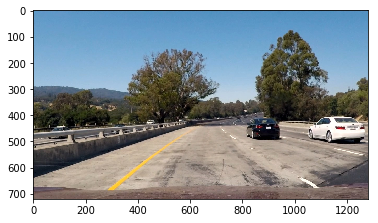

In [71]:
test_img_path = "..//test_images"
img = cv2.imread(os.path.join(test_img_path, 'test1.jpg'))  
# RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(RGB_img)

## Get undistorted image

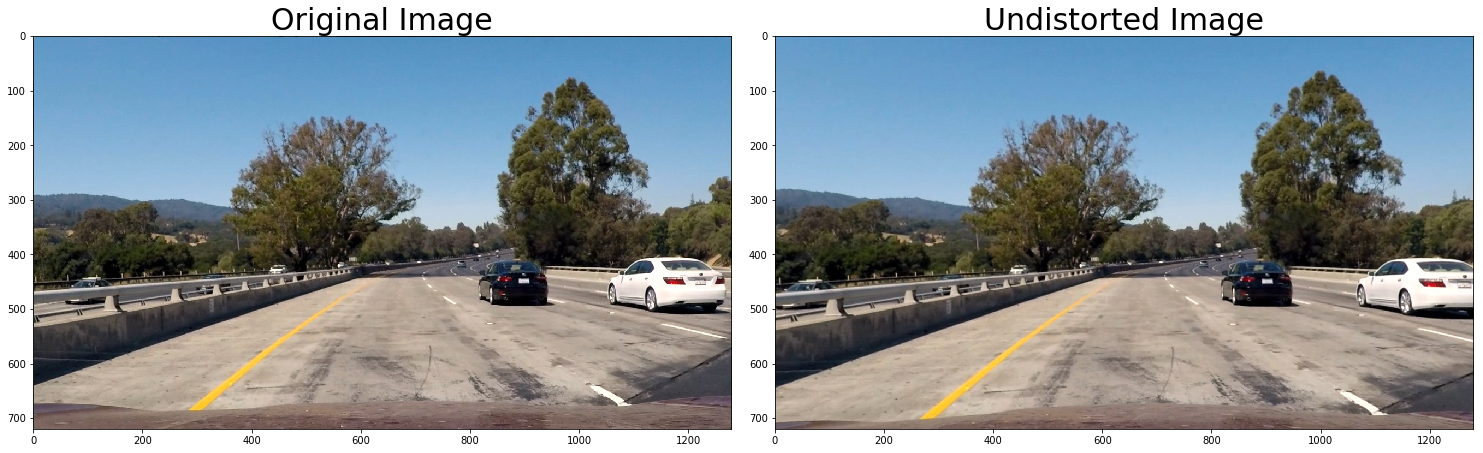

In [81]:
def cal_undistort(img, objpoints, imgpoints):
    """
    1. read an image, object points, and image points
    2. performs the camera calibration, image distortion correction
    3. returns the undistorted image
    """
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    img_corner = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    matrix_data_path = "..//matrix_data//wide_dist_pickle.p"
    chessboard_calibrationPoint = {"objpoints": objpoints, "imgpoints": imgpoints}
    write_pickle(matrix_data_path, chessboard_calibrationPoint)

    # Save the camera calibration result for later use (Ignore about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )

    return undist

cp_img = np.copy(img)
RGB_img = cv2.cvtColor(cp_img, cv2.COLOR_BGR2RGB)

undistorted= cal_undistort(cp_img, objpoints, imgpoints)
undistorted = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
f.tight_layout()
ax1.imshow(RGB_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(3, 1280, 720)